# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(study_results,mouse_metadata, on='Mouse ID', how='left')

# Display the data table for preview
merge_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Checking the number of mice.
merge_df['Mouse ID'].nunique()

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = merge_df[merge_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice = duplicate_rows['Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
mask = 'g989'
specific_mouse_data = merge_df[merge_df['Mouse ID'] == mask]
specific_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_merge_df = merge_df.loc[~merge_df['Mouse ID'].isin(duplicate_mice)]
clean_merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [9]:
# Checking the number of mice in the clean DataFrame.
total_mouses = clean_merge_df['Mouse ID'].nunique()
total_mouses

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = clean_merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)']

mean_tumor = summary_stats.mean()
median_tumor = summary_stats.median()
var_tumor = summary_stats.var()
std_dev_tumor = summary_stats.std()
std_err_tumor = summary_stats.sem()

summary_dict = {'Mean Tumor Volume': mean_tumor, 'Median Tumor Volume': median_tumor, 'Tumor Volume Variance': var_tumor,
                  'Tumor Volume Std. Dev.': std_dev_tumor, 'Tumor Volume Std. Err.': std_err_tumor}

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_df = pd.DataFrame(summary_dict)
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_table = clean_merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    std='std',
    sem='sem'
)

# Using the aggregation method, produce the same summary statistics in a single line


summary_table

,mean,median,variance,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
clean_merge_df['Drug Regimen'].unique()


array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Zoniferol', 'Propriva', 'Placebo', 'Ceftamin'],
      dtype=object)

## Bar and Pie Charts

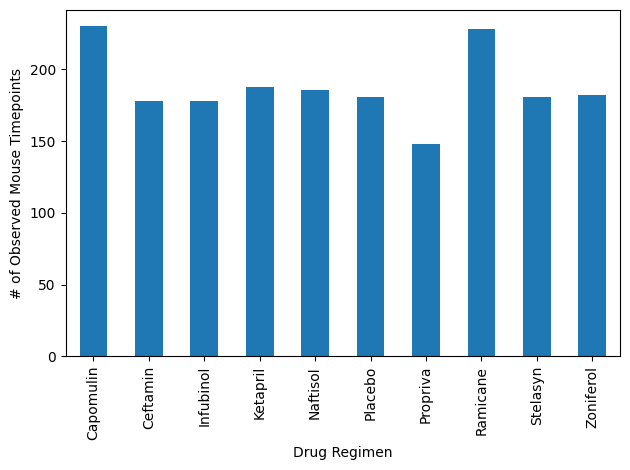

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

grouped_data = clean_merge_df.groupby('Drug Regimen').size()
grouped_data.plot(kind='bar')

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.tight_layout()
plt.show()

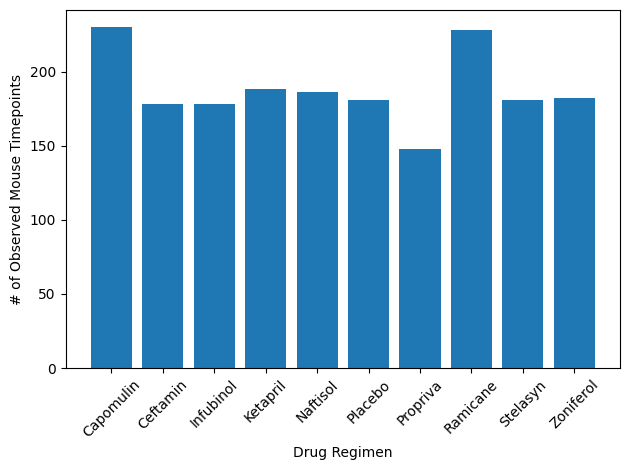

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
second_grouped_data = clean_merge_df.groupby('Drug Regimen').size()

drug_regimens = second_grouped_data.index
count_per_regimen = second_grouped_data.values

plt.bar(drug_regimens, count_per_regimen)

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

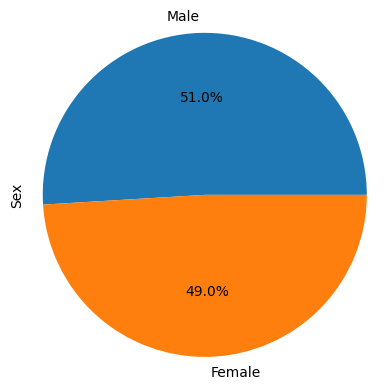

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = clean_merge_df['Sex'].value_counts()

plot = gender_distribution.plot(kind='pie', autopct='%1.1f%%', figsize=(4,4))

plot.set_ylabel('Sex')
plt.axis('equal')

plt.tight_layout()
plt.show()

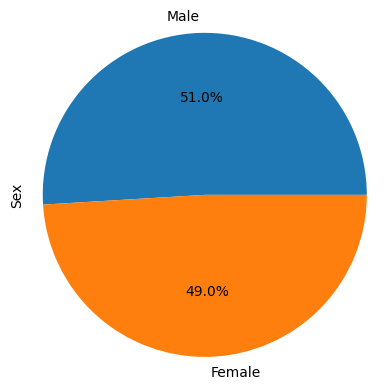

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
second_gender_distribution = clean_merge_df['Sex'].value_counts()

labels = second_gender_distribution.index
sizes = second_gender_distribution.values

plt.figure(figsize=(4, 4)) 
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.ylabel('Sex')
plt.axis('equal')

plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = clean_merge_df[clean_merge_df['Drug Regimen'].isin(selected_regimens)]
# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = filtered_data.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(last_timepoints, clean_merge_df, on=['Mouse ID', 'Timepoint'], how='left')


In [26]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:

    treatment_data = merged_data[merged_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']


    # Locate the rows which contain mice on each drug and get the tumor volume
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile

    # add subset 
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)

    # Determine outliers using upper and lower bounds
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]

    print(f"{treatment}'s potential outliers:")
    if outliers.empty:
        print(f"No outliers found")
    else:
        print(outliers)
    print()

Capomulin's potential outliers:
No outliers found

Ramicane's potential outliers:
No outliers found

Infubinol's potential outliers:
15    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin's potential outliers:
No outliers found



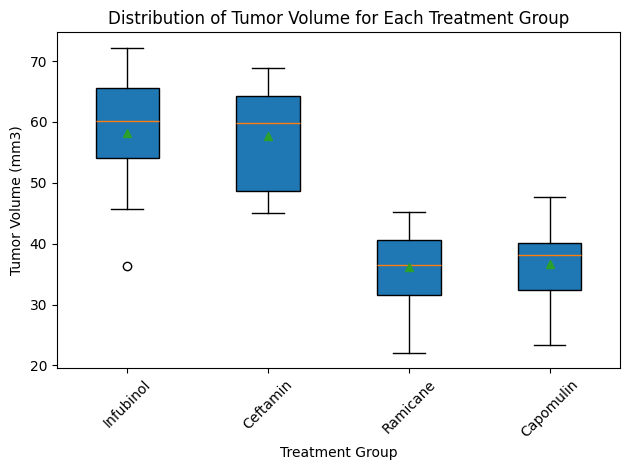

In [27]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatment_groups = {}
for treatment in merged_data['Drug Regimen'].unique():
    treatment_groups[treatment] = merged_data[merged_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']

tumor_volume_data = [values for key, values in treatment_groups.items()]

plt.boxplot(tumor_volume_data, labels=list(treatment_groups.keys()), patch_artist=True, showmeans=True)

plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Line and Scatter Plots

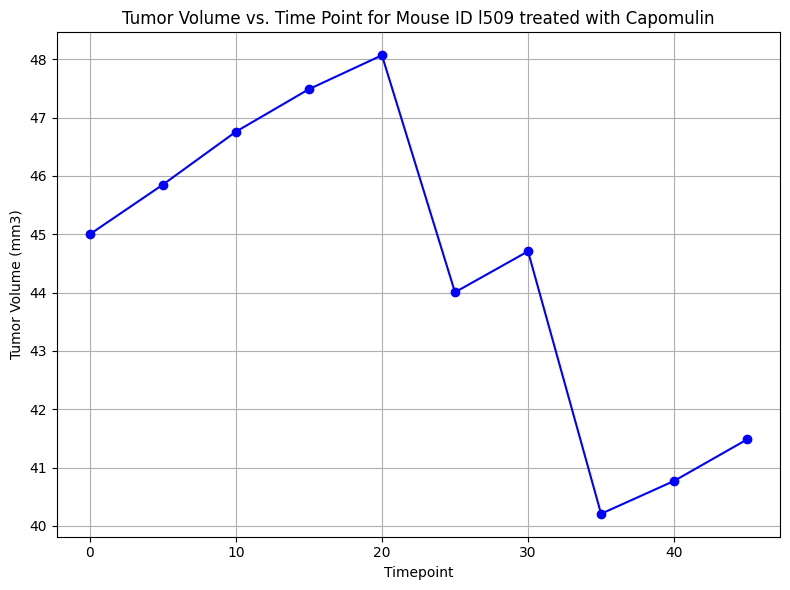

In [36]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
selected_mouse_id = 'l509'
capomulin_data = clean_merge_df[(clean_merge_df['Drug Regimen'] == 'Capomulin') & (clean_merge_df['Mouse ID'] == selected_mouse_id)]

if capomulin_data.empty:
    print(f"No data available for Mouse ID {selected_mouse_id} treated with Capomulin.")
else:
   
    plt.figure(figsize=(8, 6))
    plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], marker='o', linestyle='-', color='b')

    plt.title(f'Tumor Volume vs. Time Point for Mouse ID {selected_mouse_id} treated with Capomulin')
    plt.xlabel('Timepoint')
    plt.ylabel('Tumor Volume (mm3)')

    plt.grid(True)
    plt.tight_layout()
    plt.show()

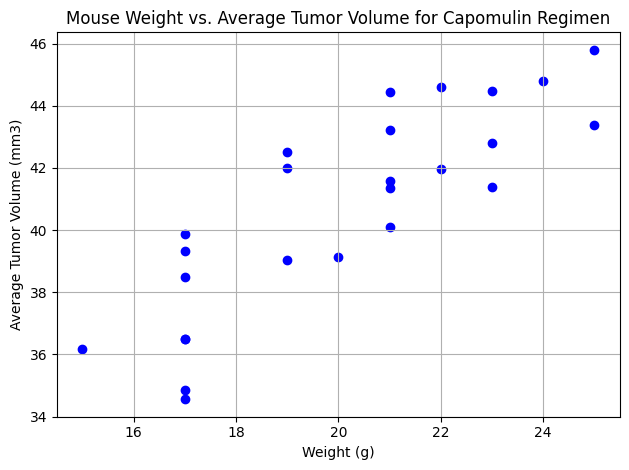

In [38]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_merge_df[clean_merge_df['Drug Regimen'] == 'Capomulin']

average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

mouse_weights = capomulin_data.drop_duplicates(subset='Mouse ID', keep='first')[['Mouse ID', 'Weight (g)']]

merged_data = pd.merge(average_tumor_volume, mouse_weights, on='Mouse ID', how='inner')

plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='blue')

plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.grid(True)
plt.tight_layout()
plt.show()

## Correlation and Regression

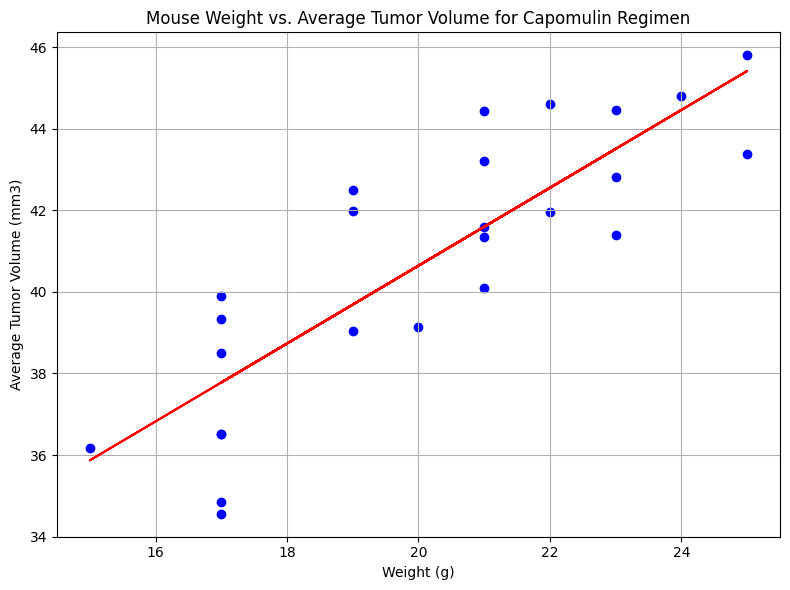

The correlation between mouse weight and the average tumor volume is: 0.84


In [44]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_merge_df[clean_merge_df['Drug Regimen'] == 'Capomulin']

average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

mouse_weights = capomulin_data.drop_duplicates(subset='Mouse ID', keep='first')[['Mouse ID', 'Weight (g)']]

merged_data = pd.merge(average_tumor_volume, mouse_weights, on='Mouse ID', how='inner')

correlation_coefficient = merged_data['Weight (g)'].corr(merged_data['Tumor Volume (mm3)'])

slope, intercept, r_value, p_value, std_err = linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

plt.figure(figsize=(8, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='blue')

regression_values = slope * merged_data['Weight (g)'] + intercept

plt.plot(merged_data['Weight (g)'], regression_values, color='red')

plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.grid(True)

plt.tight_layout()
plt.show()

formatted_coefficient = '{:.2f}'.format(correlation_coefficient)

print(f"The correlation between mouse weight and the average tumor volume is: {formatted_coefficient}")